# SPECTRA STUDIES

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec

import photopeak_fit as pk

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 100

In [3]:
def plottext(res, cov, n):
    mus, smus = int(round(res.x[0])), int(round(cov[0][0]**.5))
    mub, smub = int(round(res.x[1])), int(round(cov[1][1]**.5))
    s, ss     = res.x[2], cov[2][2]**.5
    mu, smu   = int(round(res.x[3])), int(round(cov[3][3]**.5))
    sig, ssig = int(round(res.x[4])), int(round(cov[4][4]**.5))

    tres = (fr'$\mu_s    = {mus}\pm{smus}$' + '\n' +
            fr'$\mu_b    = {mub}\pm{smub}$' + '\n' +
            fr'$E_{{ph}} = {mu} \pm {smu}$' + '\n' +
            fr'$\sigma   = {sig} \pm {ssig}$' + '\n'+
            fr'Total Entries: {n}')
    return tres


def fitplot(E, lims, res, cov, nbins):
    a, b =lims
    fig = plt.figure()
    ax = fig.add_subplot(111)

    h, _, _ = ax.hist(E, bins=int(nbins), alpha=0.5, histtype='step', color='darkblue', linewidth=2);
    e = np.linspace(a, b, 1000)
    ax.plot(e, ((b-a)/nbins*len(E))*pk.pkpdf(e, res.x, [a,b]), c='black')

    ax.text(a, h.max()/2., s=plottext(res, cov, len(E)))

    ax.set_xlabel('Energy (pes)');
    ax.set_ylabel('Entries');

In [4]:
run = 6482

directory = './DATA/'
filename  = f'cepks_{run}_0000_11999_6q0min.h5'

data = pd.HDFStore(directory + filename)['/esum']

In [5]:
data.keys()
pes=[]
peserr=[]

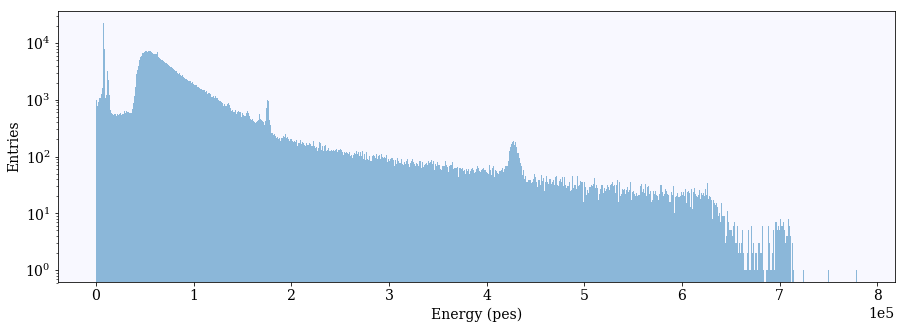

In [6]:
E = data[(data['e']<8e5)]['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(10*nbins), log=True, alpha=0.5);
ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');

# Th photopeak

In [7]:
a, b = 6.6e5, 7.3e5

thpk = data[(a<data['e'])&(data['e']<b)]

In [8]:
E = thpk['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


Optimization terminated successfully.
         Current function value: 3294.769982
         Iterations: 16
         Function evaluations: 1846


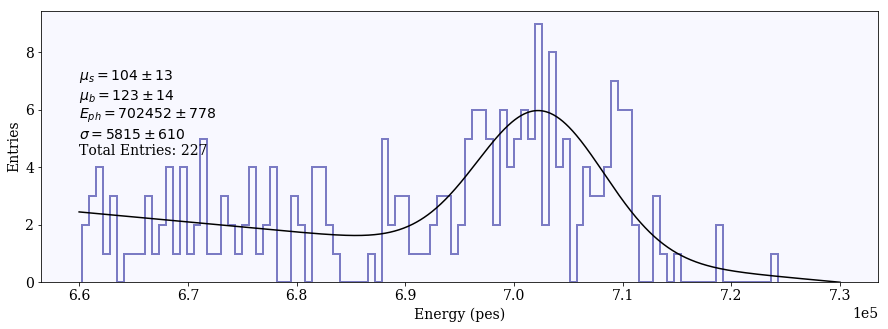

In [9]:
fitplot(E, [a, b], res, cov, nbins)

# Th double escape

In [10]:
a, b = 4.1e5, 4.45e5

thds = data[(a<data['e'])&(data['e']<b)]

In [11]:
E = thds['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 57730.521930
         Iterations: 15
         Function evaluations: 1689


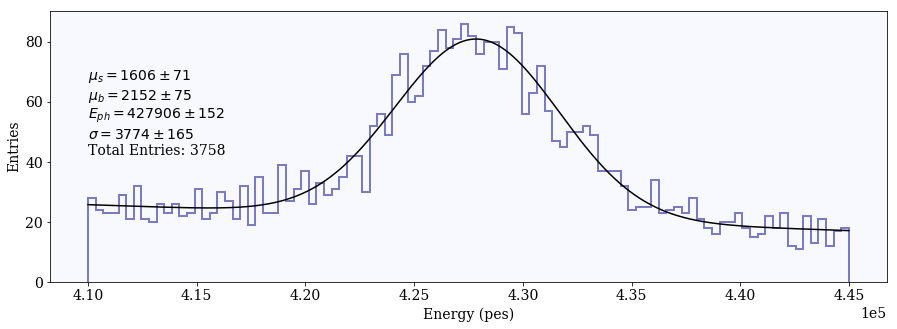

In [12]:
fitplot(E, [a, b], res, cov, nbins)

# Cs photopeak

In [13]:
a, b = 1.65e5, 1.9e5

cspk = data[(a<data['e'])&(data['e']<b)]

In [14]:
E = cspk['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 197391.736579
         Iterations: 17
         Function evaluations: 1944


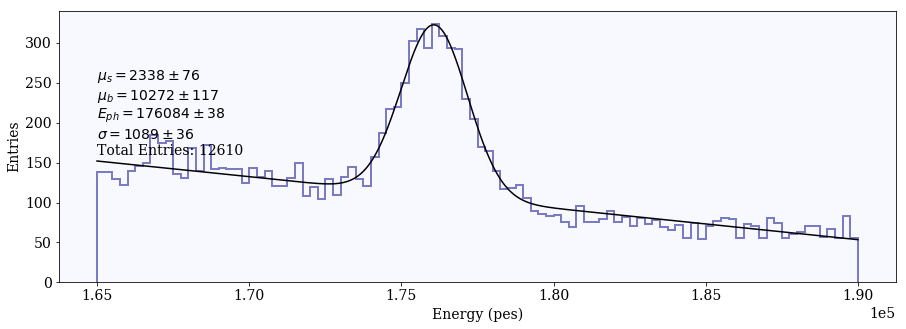

In [15]:
fitplot(E, [a, b], res, cov, nbins)

# Cs XRay

In [16]:
a, b = 1.63e5, 1.73e5

csxr = data[(a<data['e'])&(data['e']<b)]

In [17]:
E = csxr['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 78728.653468
         Iterations: 20
         Function evaluations: 1648


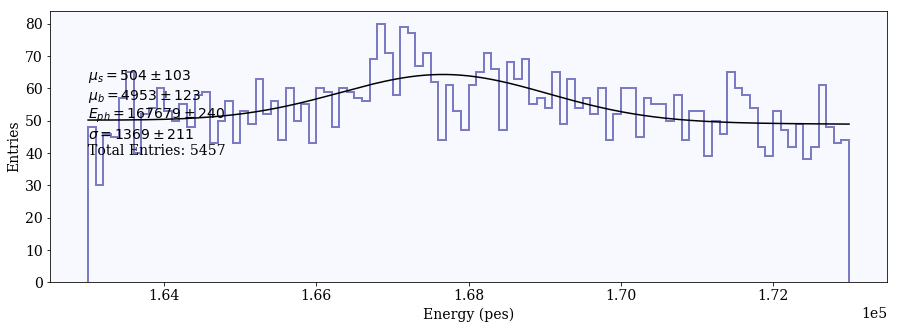

In [18]:
fitplot(E, [a, b], res, cov, nbins)

# Peaks

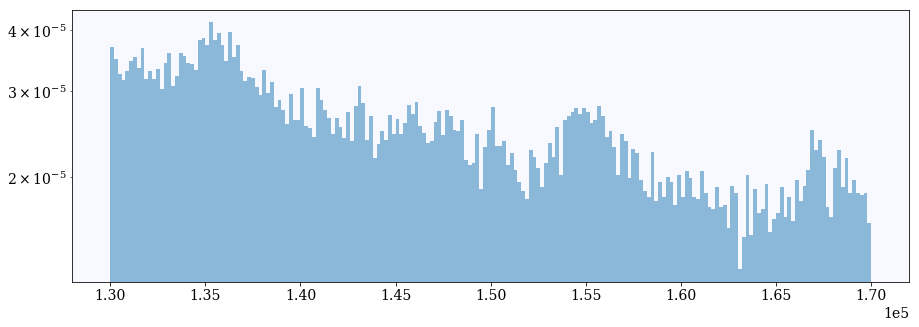

In [19]:
a, b = 1.3e5, 1.7e5

preg = data[(a<data['e'])&(data['e']<b)]
E = preg['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(2*nbins), log=True, alpha=0.5, density=True);

## Peak 1

In [20]:
a, b = 1.5e5, 1.6e5

pe1 = data[(a<data['e'])&(data['e']<b)]
E = pe1['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 99125.253452
         Iterations: 16
         Function evaluations: 1736


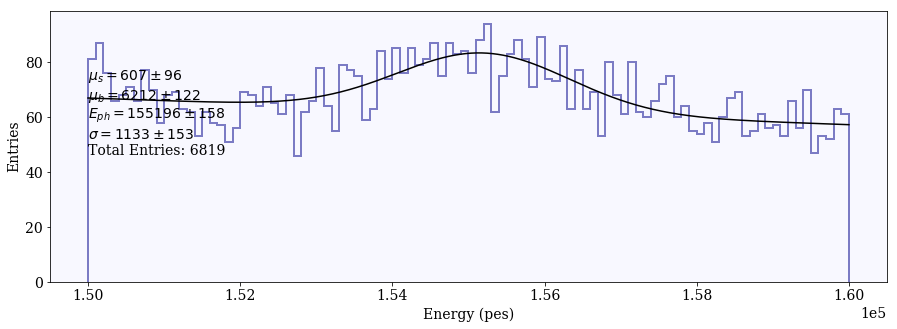

In [21]:
fitplot(E, [a, b], res, cov, nbins)

## Peak 2

In [22]:
a, b = 1.3e5, 1.4e5

xray = data[(a<data['e'])&(data['e']<b)]
E = xray['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 148379.362083
         Iterations: 21
         Function evaluations: 2351


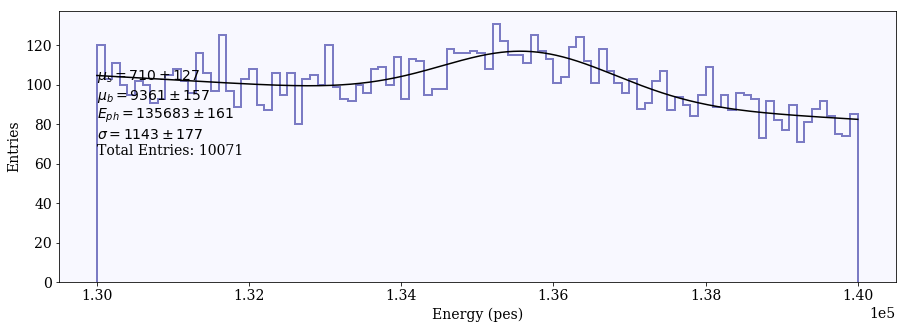

In [23]:
fitplot(E, [a, b], res, cov, nbins)

# XRays

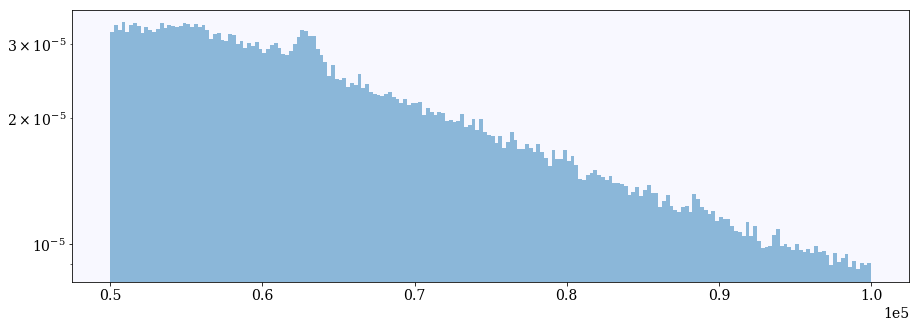

In [24]:
a, b = 0.5e5, 1e5

xray = data[(a<data['e'])&(data['e']<b)]
E = xray['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(2*nbins), log=True, alpha=0.5, density=True);

In [25]:
a, b = .58e5, .68e5

xr1 = data[(a<data['e'])&(data['e']<b)]
E = xr1['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 1220330.555729
         Iterations: 18
         Function evaluations: 1515


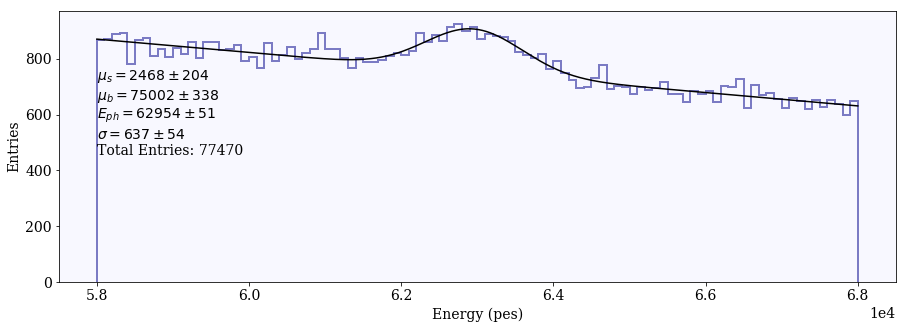

In [26]:
fitplot(E, [a, b], res, cov, nbins)

# Calibration line

In [27]:
pt = ['Thpk', 'Thde', 'Cs', 'CsXRay' , 'Peak1', 'XRay2']

pes    = np.array(pes)
peserr = np.array(peserr)

kev = np.array([2600, 1592.5, 661.6, 633.9, 583, 510, 41])

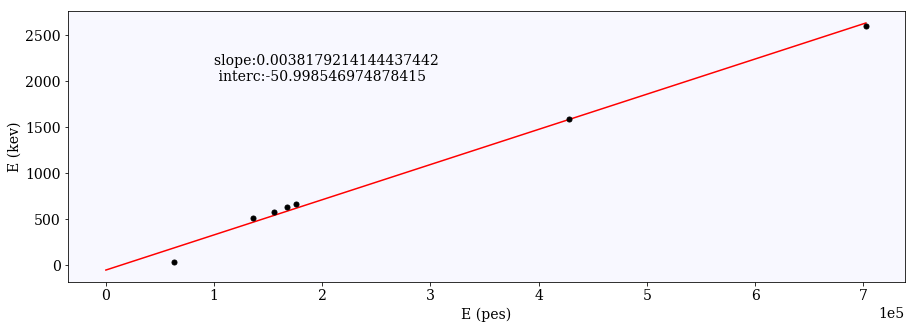

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

p, c = np.polyfit(pes, kev, 1)
ax.errorbar(pes, kev, xerr=peserr, fmt='o', markersize=5, color='black');
e=np.linspace(0, pes.max())
ax.plot(e, p*e + c, c='r');

ax.text(1e5, 2e3, s=f'slope:{p} \n interc:{c}')

ax.set_xlabel('E (pes)');
ax.set_ylabel('E (kev)');